In [1]:
hbarc = 197.326980
dp = hbarc*.03

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from matplotlib.colors import LogNorm

In [13]:
df = pd.read_csv('/Users/noah/Physics/Fermilab/MEC/MEC_em/test.txt', delimiter=r'\s+', skiprows=1, header=None, names=['p1', 'p2', 'NN', 'pp', 'np'])
df['p1'] = pd.to_numeric(df['p1'], errors='coerce')
df['p2'] = pd.to_numeric(df['p2'], errors='coerce')
df['NN'] = pd.to_numeric(df['NN'], errors='coerce')
df['pp'] = pd.to_numeric(df['pp'], errors='coerce')
df['np'] = pd.to_numeric(df['np'], errors='coerce')

#df['p1'] = df['p1']*hbarc
#df['p2'] = df['p2']*hbarc
#df['NN'] = df['NN']/pow(hbarc,6)
#df['pp'] = df['pp']/pow(hbarc,6)
#df['np'] = df['np']/pow(hbarc,6)
#df = df.dropna()

In [14]:
df

,p1,p2,NN,pp,np
0,0.015,0.015,100861.242363,30781.198895,70080.043469
1,0.015,0.045,102209.982236,31722.456722,70487.525514
2,0.015,0.075,104076.872847,32879.368698,71197.504149
3,0.015,0.105,106308.306881,34172.936539,72135.370342
4,0.015,0.135,108771.597053,35570.321238,73201.275815
...,...,...,...,...,...
39995,5.985,5.865,0.000000,0.000000,0.000000
39996,5.985,5.895,0.000000,0.000000,0.000000
39997,5.985,5.925,0.000000,0.000000,0.000000
39998,5.985,5.955,0.000000,0.000000,0.000000


In [4]:
def replace_with_zero(row):
    if row.isnull().any():
        row[-3:] = 0
    return row

df = df.apply(replace_with_zero,axis=1)

In [31]:
df['p2sqNN'] = pow(df['p2'],2)*df['NN']*dp*4.*np.pi
resultNN = df.groupby('p1')['p2sqNN'].sum().reset_index()
resultNN.columns = ['p1','np1']

df['p2sqpp'] = pow(df['p2'],2)*df['pp']*dp*4.*np.pi
resultpp = df.groupby('p1')['p2sqpp'].sum().reset_index()
resultpp.columns = ['p1','np1']

df['p2sqnp'] = pow(df['p2'],2)*df['np']*dp*4.*np.pi
resultnp = df.groupby('p1')['p2sqnp'].sum().reset_index()
resultnp.columns = ['p1','np1']

In [32]:
resultNN['rownorm'] = pow(resultNN['p1'],2)*resultNN['np1']*dp*4.*np.pi
normNN = resultNN['rownorm'].sum()
print(normNN/pow(2*np.pi,6))

resultpp['rownorm'] = pow(resultpp['p1'],2)*resultpp['np1']*dp*4.*np.pi
normpp = resultpp['rownorm'].sum()
print(normpp/pow(2*np.pi,6))

resultnp['rownorm'] = pow(resultnp['p1'],2)*resultnp['np1']*dp*4.*np.pi
normnp = resultnp['rownorm'].sum()
print(normnp/pow(2*np.pi,6))

1268925.3435232418
575181.5702075855
693743.7733156565


Text(0.5, 0, 'p1')

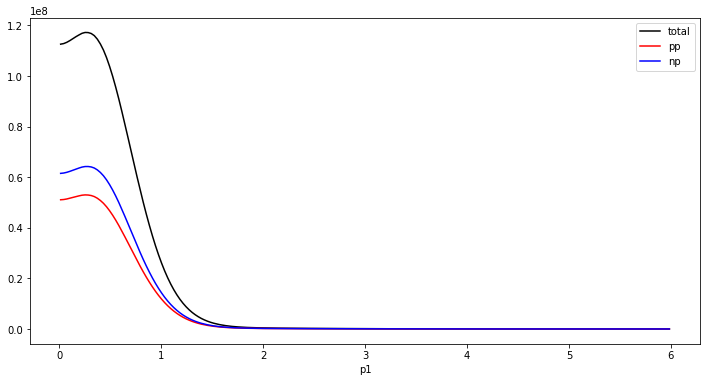

In [34]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
ax.plot(resultNN['p1'],resultNN['np1'],color='black',label='total')
ax.plot(resultpp['p1'],resultpp['np1'],color='red',label='pp')
ax.plot(resultnp['p1'],resultnp['np1'],color='blue',label='np')
#ax.plot(resultnp['p1'],resultnp['np1'] + resultpp['np1'],color='purple',label='sum')
#ax.set_yscale('log')
ax.legend()

#ax.set_ylim([1e-1,6e4])
#ax.set_xlim([0,5.5])

#ax.set_yscale()

ax.set_xlabel('p1')

Text(0.5, 1.0, 'All np and pn Pairs')

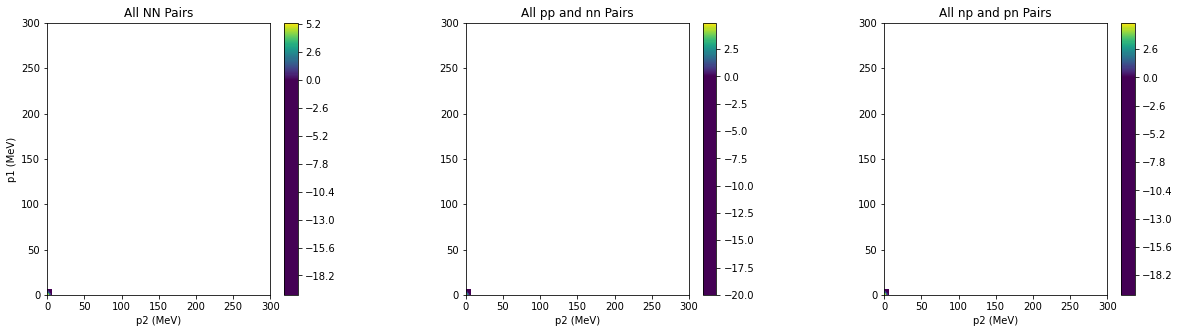

In [12]:
x = df['p1']
y = df['p2']
zNN = df['NN']
zpp = df['pp']
znp = df['np']

# Replace NaN values (resulting from conversion errors) and zero values with a small positive value
#zNN = zNN.replace(0, 1e-20).fillna(1e-20)
zNN = np.log10(zNN)

zpp = zpp.replace(0, 1e-20).fillna(1e-20)
zpp = np.log10(zpp)

znp = znp.replace(0, 1e-20).fillna(1e-20)
znp = np.log10(znp)

x_grid, y_grid = np.meshgrid(np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100))
zNN_grid = griddata((x, y), zNN, (x_grid, y_grid), method='cubic')
zpp_grid = griddata((x, y), zpp, (x_grid, y_grid), method='cubic')
znp_grid = griddata((x, y), znp, (x_grid, y_grid), method='cubic')

fig,ax = plt.subplots(1,3,figsize=(20,5))
plt.subplots_adjust(wspace=0.5)

zNNplot = ax[0].tricontourf(x, y, zNN, levels=300, cmap='viridis', vmin=1e-10)
zppplot = ax[1].tricontourf(x, y, zpp, levels=300, cmap='viridis', vmin=1e-10)
znpplot = ax[2].tricontourf(x, y, znp, levels=300, cmap='viridis', vmin=1e-10)

fig.colorbar(zNNplot, ax=ax[0])
fig.colorbar(zppplot, ax=ax[1])
fig.colorbar(znpplot, ax=ax[2])

for axis in ax:
    axis.set_xlim([0,300])
    axis.set_ylim([0,300])
    axis.set_xlabel('p2 (MeV)')
    
ax[0].set_ylabel('p1 (MeV)')
ax[0].set_title('All NN Pairs')
ax[1].set_title('All pp and nn Pairs')
ax[2].set_title('All np and pn Pairs')

In [ ]:
p1i = df['p1'].values
p2i = df['p2'].values

P1,P2 = np.meshgrid(p1i,p2i)
#pp = griddata((df['p1'],df['p2']), df['pp'], (P1,P2), method='linear')
#np = griddata((df['p1'],df['p2']), df['np'], (P1,P2), method='linear')

In [ ]:
norm_pp = mcolors.LogNorm(vmin=np.min(pp), vmax=np.max(pp))
norm_np = mcolors.LogNorm(vmin=np.min(np), vmax=np.max(np))

fig, ax = plt.subplots((1,2),figsize=(12,8))
ax[0].pcolormesh(P1,P2,pp,norm=norm_pp, shading='auto', cmap='Blues')

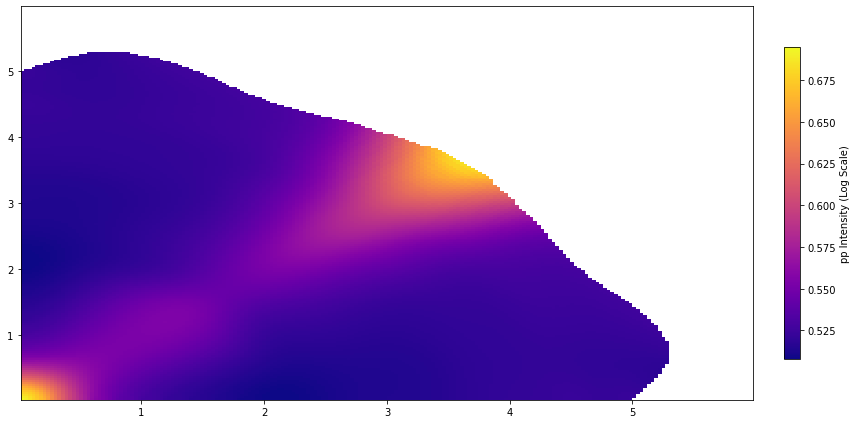

In [28]:
fig,ax = plt.subplots(1,1,figsize=(12, 6),sharey=True)

# Use p1 and p2 as the X, Y coordinates and pp as the weights for the histogram
pp = ax.hist2d(df['p1'], df['p2'], bins=200, weights=df['np']/df['NN'], cmap='plasma')

#np = ax[1].hist2d(df['p1'], df['p2'], bins=200, weights=df['np'], cmap='plasma', norm=LogNorm())


cbar = fig.colorbar(pp[3], ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('pp Intensity (Log Scale)')

# Add labels and title
#plt.xlabel('p1')
#plt.ylabel('p2')
#plt.title('2D Histogram of pp vs p1 and p2')

# Show the plot
plt.tight_layout()
plt.show()

In [41]:
#df_pp = pd.read_csv('/Users/noah/Physics/Fermilab/MEC/MEC_em/code_n2b/C12_961_37p0_2b_pp_FG.out', delimiter=r'\s+', header=None, names=['w', 'sig', 'err'])

#df_pn = pd.read_csv('/Users/noah/Physics/Fermilab/MEC/MEC_em/code_n2b/C12_961_37p0_2b_pn_FG.out', delimiter=r'\s+', header=None, names=['w', 'sig', 'err'])

#df_tot = pd.read_csv('/Users/noah/Physics/Fermilab/MEC/MEC_em/code_n2b/C12_961_37p0_2b_tot_FG.out', delimiter=r'\s+', header=None, names=['w', 'sig', 'err'])

#df_tot_reDelta = pd.read_csv('/Users/noah/Physics/Fermilab/MEC/MEC_em/code_n2b/C12_961_37p0_2b_tot_FG_reDelta.out', delimiter=r'\s+', header=None, names=['w', 'sig', 'err'])

#df_tot_reDelta2 = pd.read_csv('/Users/noah/Physics/Fermilab/MEC/MEC_em/code_n2b/C12_961_37p0_2b_tot_FG_reDelta2.out', delimiter=r'\s+', header=None, names=['w', 'sig', 'err'])

#df_tot_nopot = pd.read_csv('/Users/noah/Physics/Fermilab/MEC/MEC_em/code_n2b/C12_961_37p0_2b_tot_FG_nopot.out', delimiter=r'\s+', header=None, names=['w', 'sig', 'err'])

df_ja = pd.read_csv('/Users/noah/Physics/Fermilab/MEC/MEC_em/code_n2b/test_ja_full.out', delimiter=r'\s+', header=None, names=['w', 'sig', 'err'])

df_ja_nopot_reDelta = pd.read_csv('/Users/noah/Physics/Fermilab/MEC/MEC_em/code_n2b/test_ja_nopot_reDelta.out', delimiter=r'\s+', header=None, names=['w', 'sig', 'err'])

df_ja_nopot_reDelta_noemi = pd.read_csv('/Users/noah/Physics/Fermilab/MEC/MEC_em/code_n2b/test_ja_nopot_reDelta_noemi.out', delimiter=r'\s+', header=None, names=['w', 'sig', 'err'])

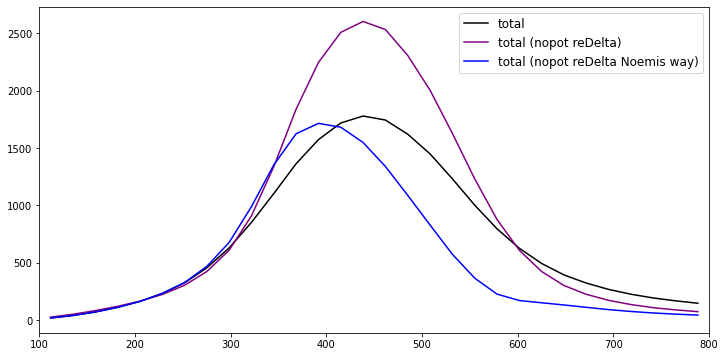

In [45]:
plt.figure(figsize=(12,6))

#plt.plot(df_pp['w'], df_pp['sig'], label='pp',color='blue')
#plt.plot(df_pn['w'], df_pn['sig'], label='pn', color='red')

#plt.plot(df_pp['w'], (df_pp['sig'] + df_pn['sig']), label='total',color='black')

plt.plot(df_ja['w'], (df_ja['sig']), label='total',color='black')

plt.plot(df_ja_nopot_reDelta['w'], (df_ja_nopot_reDelta['sig']), label='total (nopot reDelta)',color='purple')

plt.plot(df_ja_nopot_reDelta_noemi['w'], (df_ja_nopot_reDelta_noemi['sig']), label='total (nopot reDelta Noemis way)',color='blue')


plt.xlim([100,800])
#plt.ylim([0,3500])
plt.legend(fontsize=12)


In [36]:
df_ja

,w,sig,err
0,10.0,0.0,0.0
1,30.0,0.0,0.0
2,50.0,0.0,0.0
3,70.0,0.0,0.0
4,90.0,0.0,0.0
5,110.0,0.0,0.0
6,130.0,0.0,0.0
7,150.0,0.0,0.0
8,170.0,0.0,0.0
9,190.0,0.0,0.0
